# <center>ITS307 Data Analytics : Autumn Semester 2022</center>

# <center>Practical 5</center>

# <center>Feature Engineering</center>

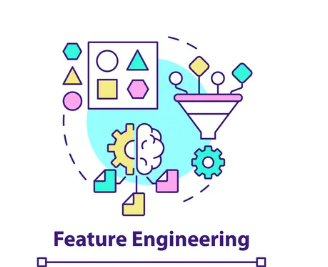

# Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Imputing Numerical Features </li>
<li> Detecting Outlier</li>
<li> Feature Transformation</li>
<li> Feature Scaling </li>
<li> Working with Categorical Features </li>
<li> Combine Features</li>
</ol>

## 0. Learning Objectives

Implement Numerical feature engineering techniques such as outlier detection, feature transformation, and feature scaling.

By the end of the lab, you should be able to :
- Apply required feature engineering techniques to given dataset.


- Prepare features for traning machine learning model.

# 1. Imputing Numerical  Features using sklearn

Instructions:

- Load data from loan_train.csv file. Create a dataframe names `ndf` which contains only numerical features. Default datatype of `Dependents` feature is `object`. Do you think it should be numerical feature? Justify your answer.


- Use sklearn SimpleImputer to Impute the missing values using most suitable strategy.



In [44]:
# Write your solution here
import pandas as pd
from sklearn.impute import SimpleImputer

ndf = pd.read_csv("loan_train.csv")
numerical_cols=ndf.select_dtypes(include = "number")

impute = SimpleImputer(strategy = 'mean')
data = impute.fit_transform(numerical_cols)
data
#since transformed using schikit, the data will be in array so we need to make it to dataframe
df = pd.DataFrame(data, columns = numerical_cols.columns)
df.isna().sum()



ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

# 2. Outlier Detection

Instructions:

- Choose any one numerical feature and check if there is any outliers.


- Use both inter quartile range method and standard deviation method to remove outliers in the dataset.

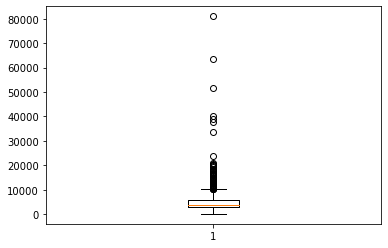

In [50]:
#Write your solution here
import matplotlib.pyplot as plt
plt.boxplot(df['ApplicantIncome'])
plt.show()



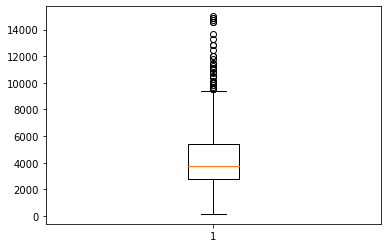

In [51]:
Q1 = df.ApplicantIncome.quantile(0.25)
Q3 = df.ApplicantIncome.quantile(0.75)
IQR = Q3-Q1
upperlimit = Q3 + (IQR * 1.5)
lowerlimit = Q1 - (IQR * 1.5)

ndf1 = df[(df.ApplicantIncome > lowerlimit) & (df.ApplicantIncome < 15000)]
ndf1.shape
plt.boxplot(ndf1['ApplicantIncome'])
plt.show()

## 3. Feature Transformation

Instructions:

- Use an appropriate graph to explore the distribution of each numeric feature. 



- Choose any one feature that needs to apply feature transformation. Apply each feature transformation technique and justify which feature transformation technique is suitable for the chosen feature.

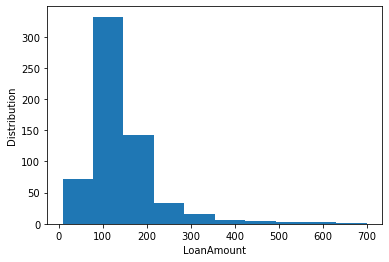

In [60]:
x = df.LoanAmount
plt.xlabel('LoanAmount')
plt.ylabel('Distribution')
plt.hist(x)
plt.show()

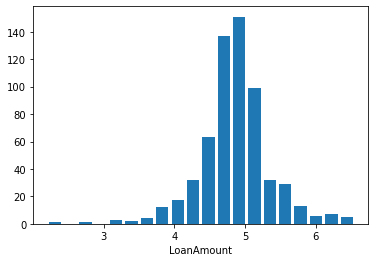

In [68]:
#Logarithmic Transformation
import numpy as np
newG = np.log(df['LoanAmount'])
plt.xlabel('LoanAmount')
plt.hist(newG, rwidth = 0.8, bins = 20 )
plt.show()

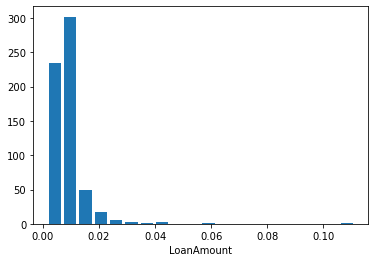

In [71]:
#reciprocal Transformation
newgraph = np.reciprocal(df.LoanAmount)
plt.hist(newgraph, rwidth = 0.8 ,bins =20)
plt.xlabel('LoanAmount')
plt.show()

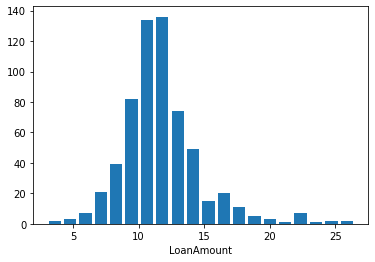

In [72]:
#Square root tranformation
n2 = np.sqrt(df.LoanAmount)
plt.hist(n2, rwidth = 0.8 ,bins =20)
plt.xlabel('LoanAmount')
plt.show()

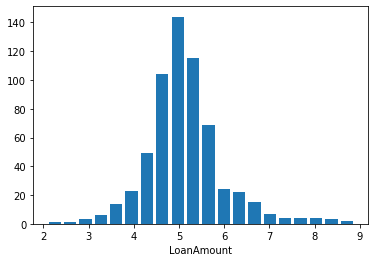

In [73]:
#cubic root tranformation
n3 = np.cbrt(df.LoanAmount)
plt.hist(n3, rwidth = 0.8 ,bins =20)
plt.xlabel('LoanAmount')
plt.show()

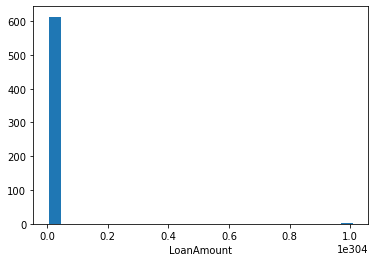

In [76]:
#– Exponential Transformation
n4 = np.exp(df.LoanAmount)
plt.hist(n4, rwidth = 0.8 ,bins =20)
plt.xlabel('LoanAmount')
plt.show()

## 4. Feature Scaling

Instructions:


- Use all feature scaling techniques to scale all the numerical features in the given datasets and observe the difference in the scaled features when you use different scaling techniques.


In [82]:
# Write your solution here
#Min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
numeric = scaler.fit_transform(df)

newdf = pd.DataFrame(numeric, columns = df.columns)
newdf

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0           0.070489           0.000000    0.198860          0.743590   
1           0.054830           0.036192    0.172214          0.743590   
2           0.035250           0.000000    0.082489          0.743590   
3           0.030093           0.056592    0.160637          0.743590   
4           0.072356           0.000000    0.191027          0.743590   
..               ...                ...         ...               ...   
609         0.034014           0.000000    0.089725          0.743590   
610         0.048930           0.000000    0.044863          0.358974   
611         0.097984           0.005760    0.353111          0.743590   
612         0.091936           0.000000    0.257598          0.743590   
613         0.054830           0.000000    0.179450          0.743590   

     Credit_History  
0               1.0  
1               1.0  
2               1.0  
3               1.0  
4               1.0  
..              ...  
609             1.0  
610             1.0  
611             1.0  
612             1.0  
613             0.0  

[614 rows x 5 columns]

In [83]:
#Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric = scaler.fit_transform(df)

newdf = pd.DataFrame(numeric,  columns = df.columns)
newdf

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0           0.072991          -0.554487    0.000000          0.279851   
1          -0.134412          -0.038732   -0.219273          0.279851   
2          -0.393747          -0.554487   -0.957641          0.279851   
3          -0.462062           0.251980   -0.314547          0.279851   
4           0.097728          -0.554487   -0.064454          0.279851   
..               ...                ...         ...               ...   
609        -0.410130          -0.554487   -0.898095          0.279851   
610        -0.212557          -0.554487   -1.267279         -2.518655   
611         0.437174          -0.472404    1.269371          0.279851   
612         0.357064          -0.554487    0.483367          0.279851   
613        -0.134412          -0.554487   -0.159728          0.279851   

     Credit_History  
0          0.451640  
1          0.451640  
2          0.451640  
3          0.451640  
4          0.451640  
..              ...  
609        0.451640  
610        0.451640  
611        0.451640  
612        0.451640  
613       -2.410441  

[614 rows x 5 columns]

In [84]:
#Robust Scaler
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
numeric = scaler.fit_transform(df)

newdf = pd.DataFrame(numeric,  columns = df.columns)
newdf

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0           0.698029          -0.517358    0.269956               0.0   
1           0.264096           0.139079   -0.015504               0.0   
2          -0.278492          -0.517358   -0.976744               0.0   
3          -0.421422           0.509087   -0.139535               0.0   
4           0.749786          -0.517358    0.186047               0.0   
..               ...                ...         ...               ...   
609        -0.312768          -0.517358   -0.899225               0.0   
610         0.100600          -0.517358   -1.379845            -180.0   
611         1.459983          -0.412885    1.922481               0.0   
612         1.292374          -0.517358    0.899225               0.0   
613         0.264096          -0.517358    0.062016               0.0   

     Credit_History  
0               0.0  
1               0.0  
2               0.0  
3               0.0  
4               0.0  
..              ...  
609             0.0  
610             0.0  
611             0.0  
612             0.0  
613            -1.0  

[614 rows x 5 columns]

## 5. Categorical features


Instructions:


- Get all your categorical data in a new dataframe `cdf`. Refer your last class work on feature engineering on categorical features to make your categorical features ready for tranning machine learning model.

In [99]:
import pandas as pd
from sklearn.impute import SimpleImputer

df = pd.read_csv('loan_train.csv')
df.drop(labels = 'Loan_ID', axis = 1, inplace = True)
df
df.isnull().sum()

cat_cols = df.select_dtypes(include = ['object','bool'])
impute = SimpleImputer(strategy = 'most_frequent')
data = impute.fit_transform(cat_cols)
data
#since transformed using schikit, the data will be in array so we need to make it to dataframe
pdf = pd.DataFrame(data, columns = cat_cols.columns)
pdf.isna().sum()

Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
Loan_Status      0
dtype: int64

In [122]:
# Write your solution here

from sklearn.preprocessing import OneHotEncoder
# Create object of onehotencoder class
ohe = OneHotEncoder()
# call function an object
categorical = ohe.fit_transform(pdf[['Gender','Married','Self_Employed']]).toarray()

new1 = pd.DataFrame(categorical, columns =  ohe.get_feature_names_out())


# ohe.get_feature_names_out()
new1.head()

Gender_Female  Gender_Male  Married_No  Married_Yes  Self_Employed_No  \
0            0.0          1.0         1.0          0.0               1.0   
1            0.0          1.0         0.0          1.0               1.0   
2            0.0          1.0         0.0          1.0               0.0   
3            0.0          1.0         0.0          1.0               1.0   
4            0.0          1.0         1.0          0.0               1.0   

   Self_Employed_Yes  
0                0.0  
1                0.0  
2                1.0  
3                0.0  
4                0.0

In [123]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
pdf[['Education','Property_Area']] = oe.fit_transform(pdf[['Education','Property_Area']])

new2 = pd.DataFrame(pdf)
new2

Gender Married Dependents  Education Self_Employed  Property_Area  \
0      Male      No          0        0.0            No            2.0   
1      Male     Yes          1        0.0            No            0.0   
2      Male     Yes          0        0.0           Yes            2.0   
3      Male     Yes          0        1.0            No            2.0   
4      Male      No          0        0.0            No            2.0   
..      ...     ...        ...        ...           ...            ...   
609  Female      No          0        0.0            No            0.0   
610    Male     Yes         3+        0.0            No            0.0   
611    Male     Yes          1        0.0            No            2.0   
612    Male     Yes          2        0.0            No            2.0   
613  Female      No          0        0.0           Yes            1.0   

     Loan_Status  
0              1  
1              0  
2              1  
3              1  
4              1  
..           ...  
609            1  
610            1  
611            1  
612            1  
613            0  

[614 rows x 7 columns]

In [111]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
pdf['Loan_Status'] = le.fit_transform(pdf.Loan_Status)

new3 = pd.DataFrame(pdf)
new3

Gender Married Dependents  Education Self_Employed  Property_Area  \
0      Male      No          0        0.0            No            2.0   
1      Male     Yes          1        0.0            No            0.0   
2      Male     Yes          0        0.0           Yes            2.0   
3      Male     Yes          0        1.0            No            2.0   
4      Male      No          0        0.0            No            2.0   
..      ...     ...        ...        ...           ...            ...   
609  Female      No          0        0.0            No            0.0   
610    Male     Yes         3+        0.0            No            0.0   
611    Male     Yes          1        0.0            No            2.0   
612    Male     Yes          2        0.0            No            2.0   
613  Female      No          0        0.0           Yes            1.0   

     Loan_Status  
0              1  
1              0  
2              1  
3              1  
4              1  
..           ...  
609            1  
610            1  
611            1  
612            1  
613            0  

[614 rows x 7 columns]

In [125]:
cdf =pd.concat([new1,new2], axis = 1)

cdf1 = pd.concat([cdf, new3], axis = 1)
cdf1

Gender_Female  Gender_Male  Married_No  Married_Yes  Self_Employed_No  \
0              0.0          1.0         1.0          0.0               1.0   
1              0.0          1.0         0.0          1.0               1.0   
2              0.0          1.0         0.0          1.0               0.0   
3              0.0          1.0         0.0          1.0               1.0   
4              0.0          1.0         1.0          0.0               1.0   
..             ...          ...         ...          ...               ...   
609            1.0          0.0         1.0          0.0               1.0   
610            0.0          1.0         0.0          1.0               1.0   
611            0.0          1.0         0.0          1.0               1.0   
612            0.0          1.0         0.0          1.0               1.0   
613            1.0          0.0         1.0          0.0               0.0   

     Self_Employed_Yes  Gender Married Dependents  Education Self_Employed  \
0                  0.0    Male      No          0        0.0            No   
1                  0.0    Male     Yes          1        0.0            No   
2                  1.0    Male     Yes          0        0.0           Yes   
3                  0.0    Male     Yes          0        1.0            No   
4                  0.0    Male      No          0        0.0            No   
..                 ...     ...     ...        ...        ...           ...   
609                0.0  Female      No          0        0.0            No   
610                0.0    Male     Yes         3+        0.0            No   
611                0.0    Male     Yes          1        0.0            No   
612                0.0    Male     Yes          2        0.0            No   
613                1.0  Female      No          0        0.0           Yes   

     Property_Area  Loan_Status  Gender Married Dependents  Education  \
0              2.0            1    Male      No          0        0.0   
1              0.0            0    Male     Yes          1        0.0   
2              2.0            1    Male     Yes          0        0.0   
3              2.0            1    Male     Yes          0        1.0   
4              2.0            1    Male      No          0        0.0   
..             ...          ...     ...     ...        ...        ...   
609            0.0            1  Female      No          0        0.0   
610            0.0            1    Male     Yes         3+        0.0   
611            2.0            1    Male     Yes          1        0.0   
612            2.0            1    Male     Yes          2        0.0   
613            1.0            0  Female      No          0        0.0   

    Self_Employed  Property_Area  Loan_Status  
0              No            2.0            1  
1              No            0.0            0  
2             Yes            2.0            1  
3              No            2.0            1  
4              No            2.0            1  
..            ...            ...          ...  
609            No            0.0            1  
610            No            0.0            1  
611            No            2.0            1  
612            No            2.0            1  
613           Yes            1.0            0  

[614 rows x 20 columns]

## 6. Combine Features

Instructions:

- Create a new dataframe `alldf` which contains transformed categorical and numerical features ready for traning machine learning model.

In [130]:
#Write your solution here
alldf = pd.concat([cdf1, newdf], axis = 1)
alldf.isna().sum()
# alldf


Gender_Female        0
Gender_Male          0
Married_No           0
Married_Yes          0
Self_Employed_No     0
Self_Employed_Yes    0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
Property_Area        0
Loan_Status          0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
Property_Area        0
Loan_Status          0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

# <center>THANK YOU